# Exploratery Data Analysis

## Shaiq Munir Malik

There are enumerous useful visualization techniques that are useful for exploratory data analysis: In practice, the choice highly depends on the kind of data and the question at hand. 

This IPython notebook is a small gallery for visualizing the Iris flower dataset. This gallery is more meant to be a code matplotlib reference so that certain plots may be more or less useful in the context of this dataset. 

## Reading in the dataset

[[back to top](#Sections)]

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

In [4]:
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [5]:
# convert pandas DataFrame to simple numpy arrays
X = data[[0,1,2,3]].values
Y = data['Class'].values
labels = {}
for i,v in enumerate(np.unique(Y)):
    labels[v] = i
    Y[Y==v] = i
Y= Y.astype(np.int8)

## Pie chart

Plot the distribution of classes as pie chart. See the documentation for details of pie plot.

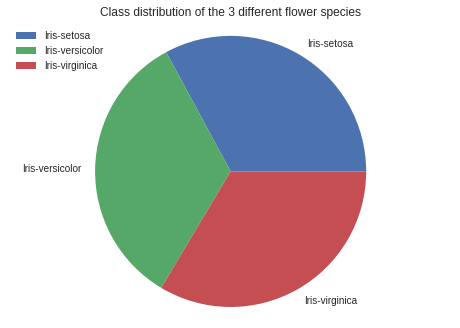

In [6]:
fig,axes=plt.subplots()
pie_sizes=[np.sum(Y==0),np.sum(Y==1),np.sum(Y==2)]
labels=['Iris-setosa','Iris-versicolor', 'Iris-virginica']
patches,text=axes.pie(pie_sizes,labels=labels)
plt.legend(loc='upper left')
plt.title("Class distribution of the 3 different flower species")
plt.axis("equal")
plt.show()

## Bar plot

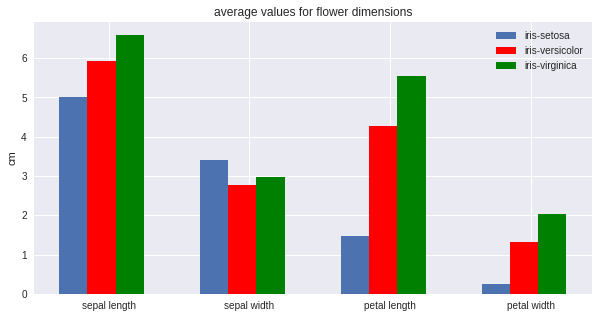

In [7]:
array1=X[Y==0]
array2=X[Y==1]
array3=X[Y==2]
means1=np.mean(array1,axis=0)
means2=np.mean(array2,axis=0)
means3=np.mean(array3,axis=0)
fig,axes=plt.subplots(figsize=(10,5))
axes.bar([0,4,8,12],means1,label='iris-setosa')
axes.bar([0.8,4.8,8.8,12.8],means2,color='red',label='iris-versicolor')
axes.bar([1.6,5.6,9.6,13.6],means3,color='green',label='iris-virginica')
axes.set_xticks([1,5,9,13])
axes.set_ylabel("cm")
axes.set_xticklabels(['sepal length','sepal width','petal length','petal width'])
axes.set_title("average values for flower dimensions")
plt.legend()

## 1D Histogram

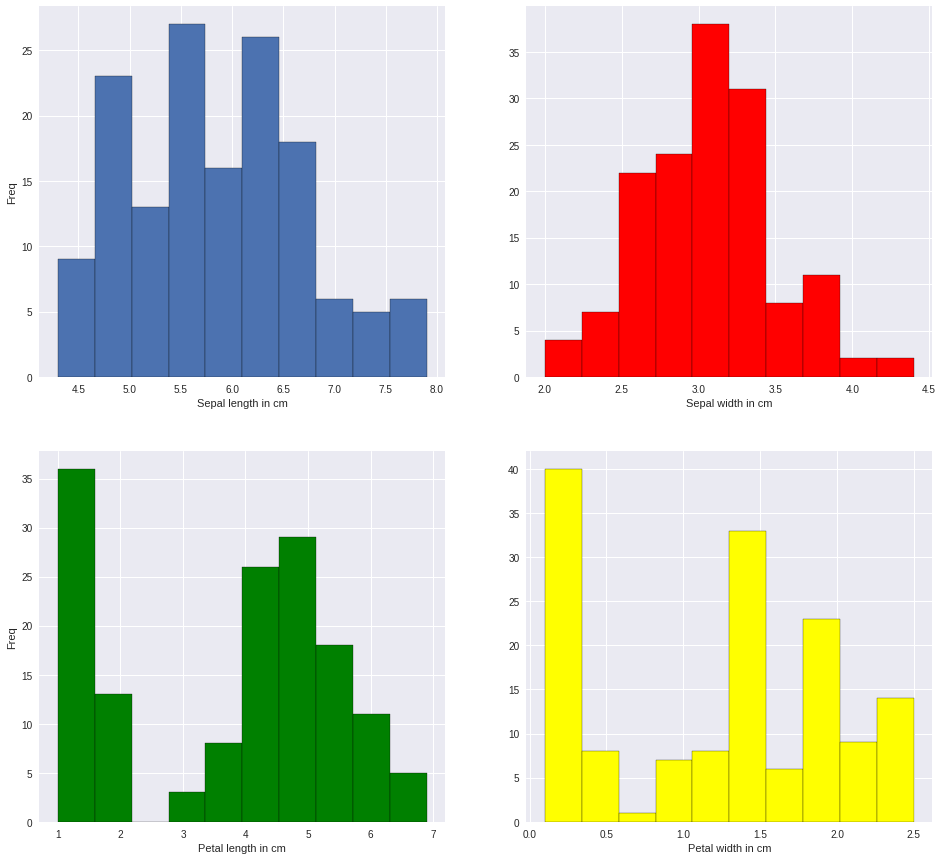

In [8]:
fig,axes=plt.subplots(2,2,figsize=(16,15))
feature1=X[:,0]
feature2=X[:,1]
feature3=X[:,2]
feature4=X[:,3]
axes[0][0].set_ylabel("Freq")
axes[0][0].hist(feature1,edgecolor="black")
axes[0][0].set_xlabel("Sepal length in cm")
axes[0][0].set_ylabel("Freq")
axes[0][1].hist(feature2,color="red",edgecolor="black")
axes[0][1].set_xlabel("Sepal width in cm")
axes[1][0].hist(feature3,color="green",edgecolor="black")
axes[1][0].set_xlabel("Petal length in cm")
axes[1][0].set_ylabel("Freq")
axes[1][1].hist(feature4,color="yellow",edgecolor="black")
axes[1][1].set_xlabel("Petal width in cm")
plt.show()

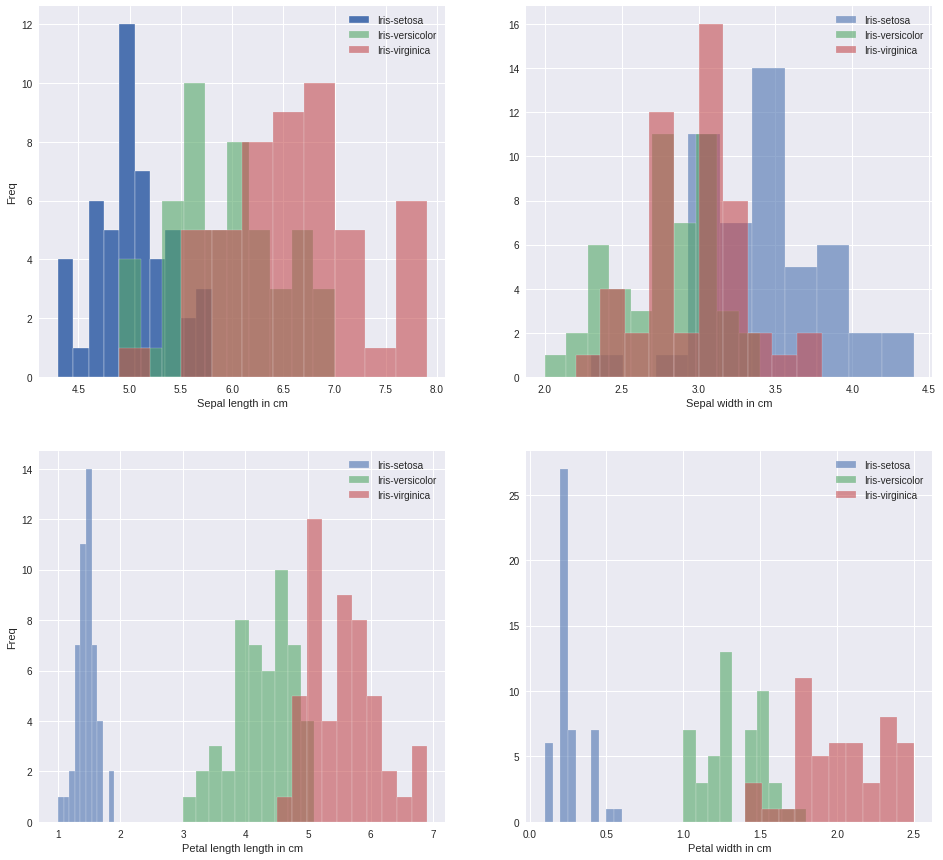

In [9]:
fig,axes=plt.subplots(2,2,figsize=(16,15))
array1=X[Y==0]
array2=X[Y==1]
array3=X[Y==2]
feature1_s=array1[:,0]
feature2_s=array1[:,1]
feature3_s=array1[:,2]
feature4_s=array1[:,3]
feature1_ver=array2[:,0]
feature2_ver=array2[:,1]
feature3_ver=array2[:,2]
feature4_ver=array2[:,3]
feature1_vir=array3[:,0]
feature2_vir=array3[:,1]
feature3_vir=array3[:,2]
feature4_vir=array3[:,3]
axes[0][0].hist(feature1_s,edgecolor="white",label="Iris-setosa")
axes[0][0].hist(feature1_ver,edgecolor="white",label="Iris-versicolor",alpha=0.6)
axes[0][0].hist(feature1_vir,edgecolor="white",label="Iris-virginica",alpha=0.6)
axes[0][0].set_xlabel("Sepal length in cm")
axes[0][0].set_ylabel("Freq")
axes[0][1].hist(feature2_s,edgecolor="white",label="Iris-setosa",alpha=0.6)
axes[0][1].hist(feature2_ver,edgecolor="white",label="Iris-versicolor",alpha=0.6)
axes[0][1].hist(feature2_vir,edgecolor="white",label="Iris-virginica",alpha=0.6)
axes[0][1].set_xlabel("Sepal width in cm")
axes[1][0].hist(feature3_s,edgecolor="white",label="Iris-setosa",alpha=0.6)
axes[1][0].hist(feature3_ver,edgecolor="white",label="Iris-versicolor",alpha=0.6)
axes[1][0].hist(feature3_vir,edgecolor="white",label="Iris-virginica",alpha=0.6)
axes[1][0].set_xlabel("Petal length length in cm")
axes[1][0].set_ylabel("Freq")
axes[1][1].hist(feature4_s,edgecolor="white",label="Iris-setosa",alpha=0.6)
axes[1][1].hist(feature4_ver,edgecolor="white",label="Iris-versicolor",alpha=0.6)
axes[1][1].hist(feature4_vir,edgecolor="white",label="Iris-virginica",alpha=0.6)
axes[1][1].set_xlabel("Petal width in cm")
axes[0][0].legend()
axes[1][0].legend()
axes[0][1].legend()
axes[1][1].legend()

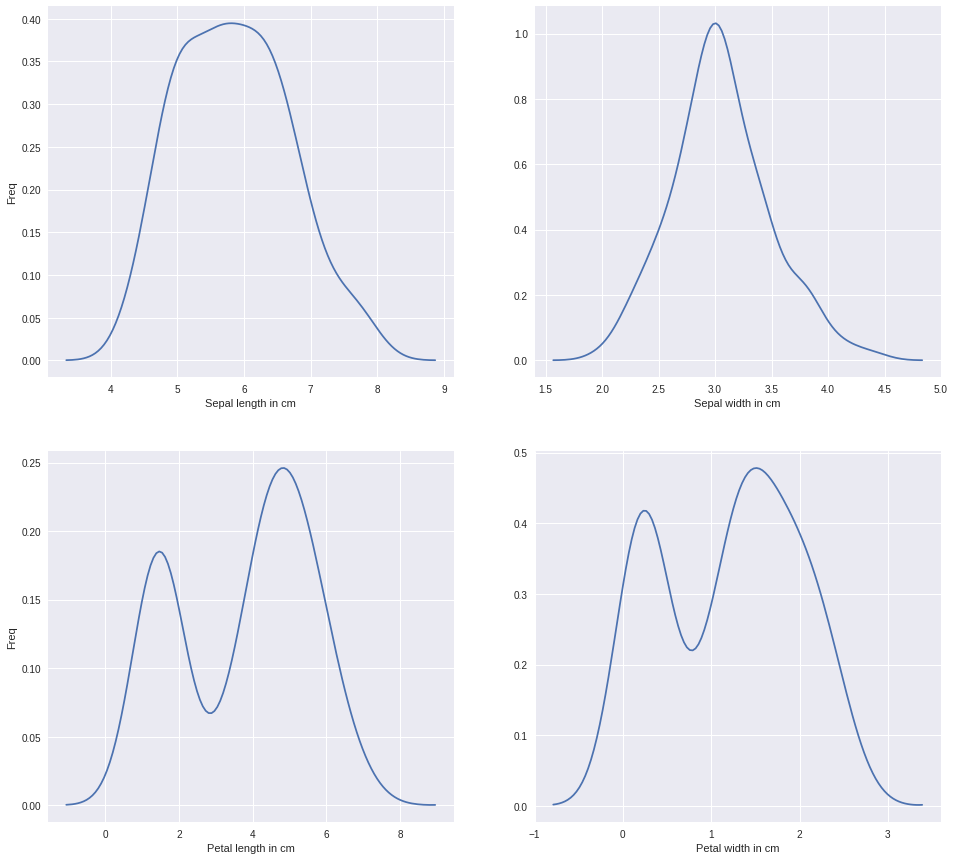

In [10]:
fig,axes=plt.subplots(2,2,figsize=(16,15))
feature1=X[:,0]
feature2=X[:,1]
feature3=X[:,2]
feature4=X[:,3]
sns.kdeplot(feature1,ax=axes[0][0])
axes[0][0].set_xlabel("Sepal length in cm")
axes[0][0].set_ylabel("Freq")
sns.kdeplot(feature2,ax=axes[0][1])
axes[0][1].set_xlabel("Sepal width in cm")
sns.kdeplot(feature3,ax=axes[1][0])
axes[1][0].set_xlabel("Petal length in cm")
axes[1][0].set_ylabel("Freq")
sns.kdeplot(feature4,ax=axes[1][1])
axes[1][1].set_xlabel("Petal width in cm")

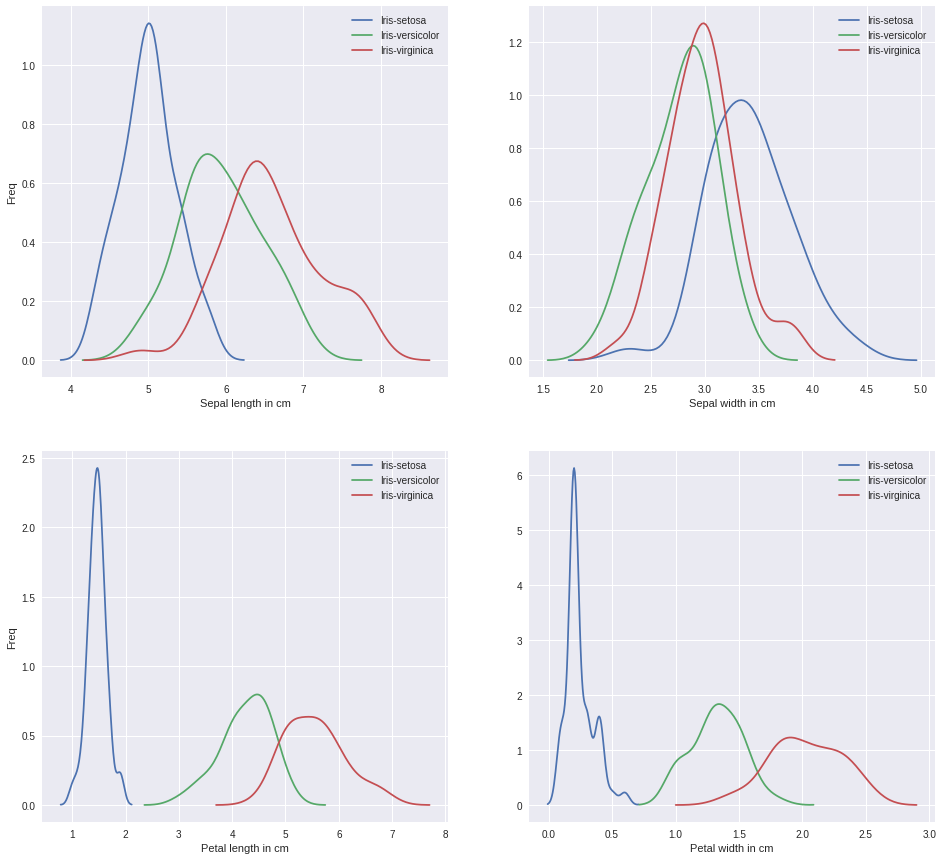

In [33]:
fig,axes=plt.subplots(2,2,figsize=(16,15))
array1=X[Y==0]
array2=X[Y==1]
array3=X[Y==2]
feature1_s=array1[:,0]
feature2_s=array1[:,1]
feature3_s=array1[:,2]
feature4_s=array1[:,3]
feature1_ver=array2[:,0]
feature2_ver=array2[:,1]
feature3_ver=array2[:,2]
feature4_ver=array2[:,3]
feature1_vir=array3[:,0]
feature2_vir=array3[:,1]
feature3_vir=array3[:,2]
feature4_vir=array3[:,3]
sns.kdeplot(feature1_s,ax=axes[0][0],label="Iris-setosa")
sns.kdeplot(feature1_ver,ax=axes[0][0],label="Iris-versicolor")
sns.kdeplot(feature1_vir,ax=axes[0][0],label="Iris-virginica")
axes[0][0].set_xlabel("Sepal length in cm")
axes[0][0].set_ylabel("Freq")
sns.kdeplot(feature2_s,ax=axes[0][1],label="Iris-setosa")
sns.kdeplot(feature2_ver,ax=axes[0][1],label="Iris-versicolor")
sns.kdeplot(feature2_vir,ax=axes[0][1],label="Iris-virginica")
axes[0][1].set_xlabel("Sepal width in cm")
sns.kdeplot(feature3_s,ax=axes[1][0],label="Iris-setosa")
sns.kdeplot(feature3_ver,ax=axes[1][0],label="Iris-versicolor")
sns.kdeplot(feature3_vir,ax=axes[1][0],label="Iris-virginica")
axes[1][0].set_xlabel("Petal length in cm")
axes[1][0].set_ylabel("Freq")
sns.kdeplot(feature4_s,ax=axes[1][1],label="Iris-setosa")
sns.kdeplot(feature4_ver,ax=axes[1][1],label="Iris-versicolor")
sns.kdeplot(feature4_vir,ax=axes[1][1],label="Iris-virginica")
axes[1][1].set_xlabel("Petal width in cm")
axes[0][0].legend()
axes[1][0].legend()
axes[0][1].legend()
axes[1][1].legend()

## Scatter plot

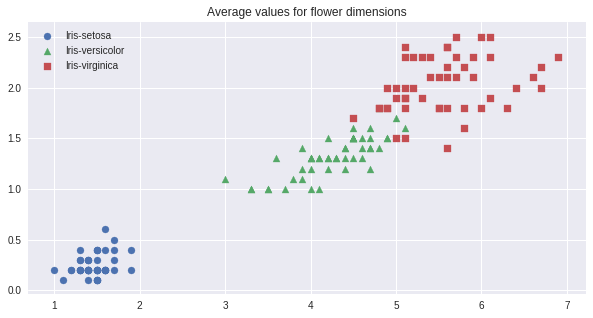

In [34]:
fig,axes=plt.subplots(figsize=(10,5))
array1=X[Y==0]
array2=X[Y==1]
array3=X[Y==2]
feature1_s=array1[:,2]
feature2_s=array1[:,3]
feature1_ver=array2[:,2]
feature2_ver=array2[:,3]
feature1_vir=array3[:,2]
feature2_vir=array3[:,3]
axes.scatter(feature1_s,feature2_s,label="Iris-setosa")
axes.scatter(feature1_ver,feature2_ver,label="Iris-versicolor",marker="^")
axes.scatter(feature1_vir,feature2_vir,label="Iris-virginica",marker="s")
axes.set_title("Average values for flower dimensions")
axes.legend()

## 3D Scatter plot

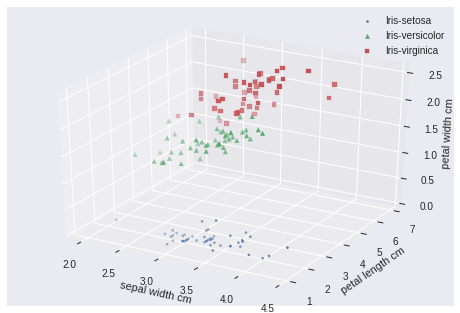

In [41]:
#fig,axes=plt.subplots(figsize=(10,5),projection='3d')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
array1=X[Y==0]
array2=X[Y==1]
array3=X[Y==2]
feature1_s=array1[:,1]
feature2_s=array1[:,2]
feature3_s=array1[:,3]
feature1_ver=array2[:,1]
feature2_ver=array2[:,2]
feature3_ver=array2[:,3]
feature1_vir=array3[:,1]
feature2_vir=array3[:,2]
feature3_vir=array3[:,3]
ax.scatter(feature1_s,feature2_s,feature3_s,label="Iris-setosa",marker=".")
ax.scatter(feature1_ver,feature2_ver,feature3_ver,label="Iris-versicolor",marker="^")
ax.scatter(feature1_vir,feature2_vir,feature3_vir,label="Iris-virginica",marker="s")
ax.set_xlabel("sepal width cm")
ax.set_ylabel("petal length cm")
ax.set_zlabel("petal width cm")
ax.legend()

# More than two variables

In [12]:
data.columns

Index([u'SepalLength', u'SepalWidth', u'PetalLength', u'PetalWidth', u'Class'], dtype='object')

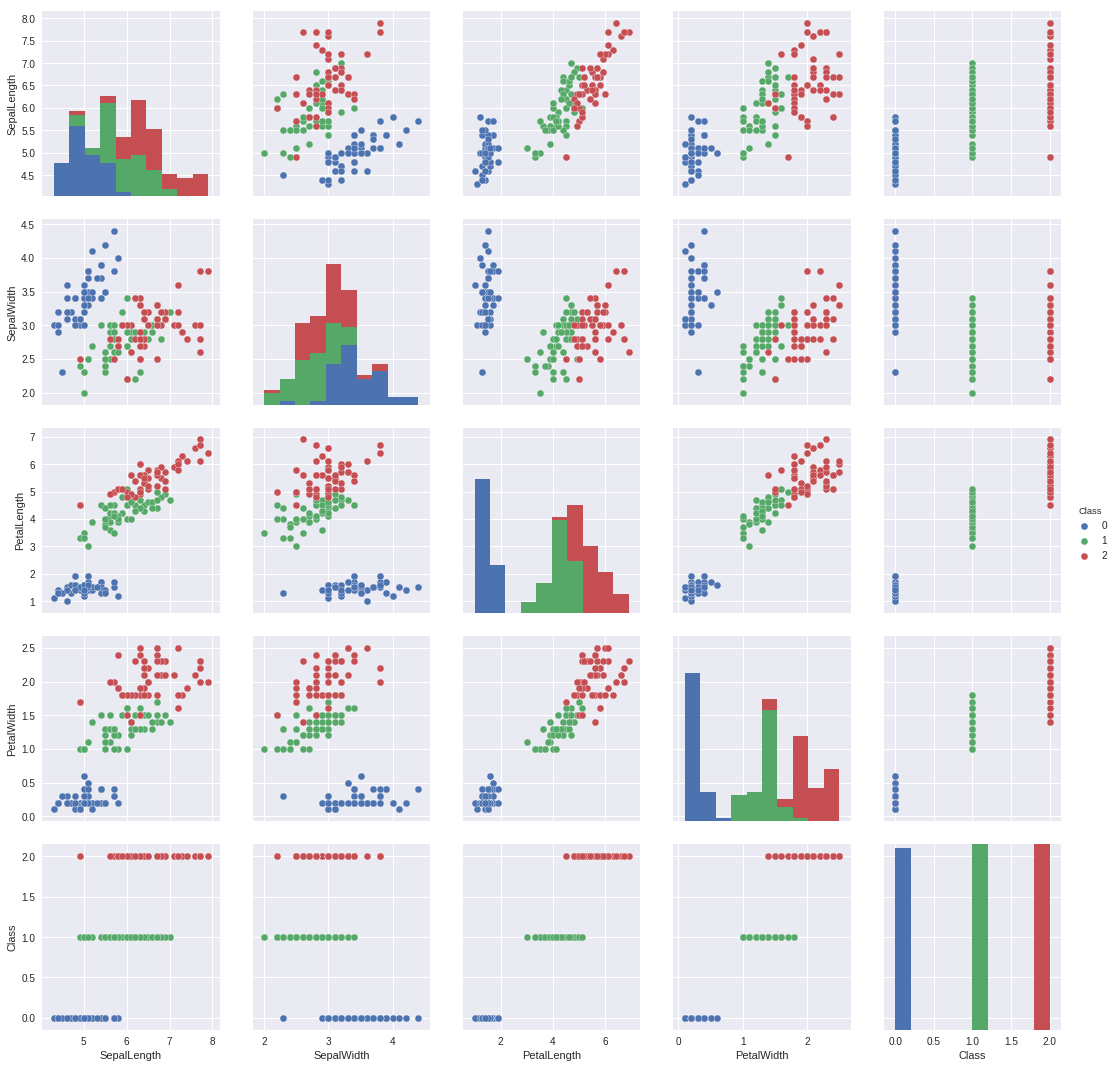

In [13]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(data, hue="Class", size=3)

/home/shaiq/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/shaiq/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


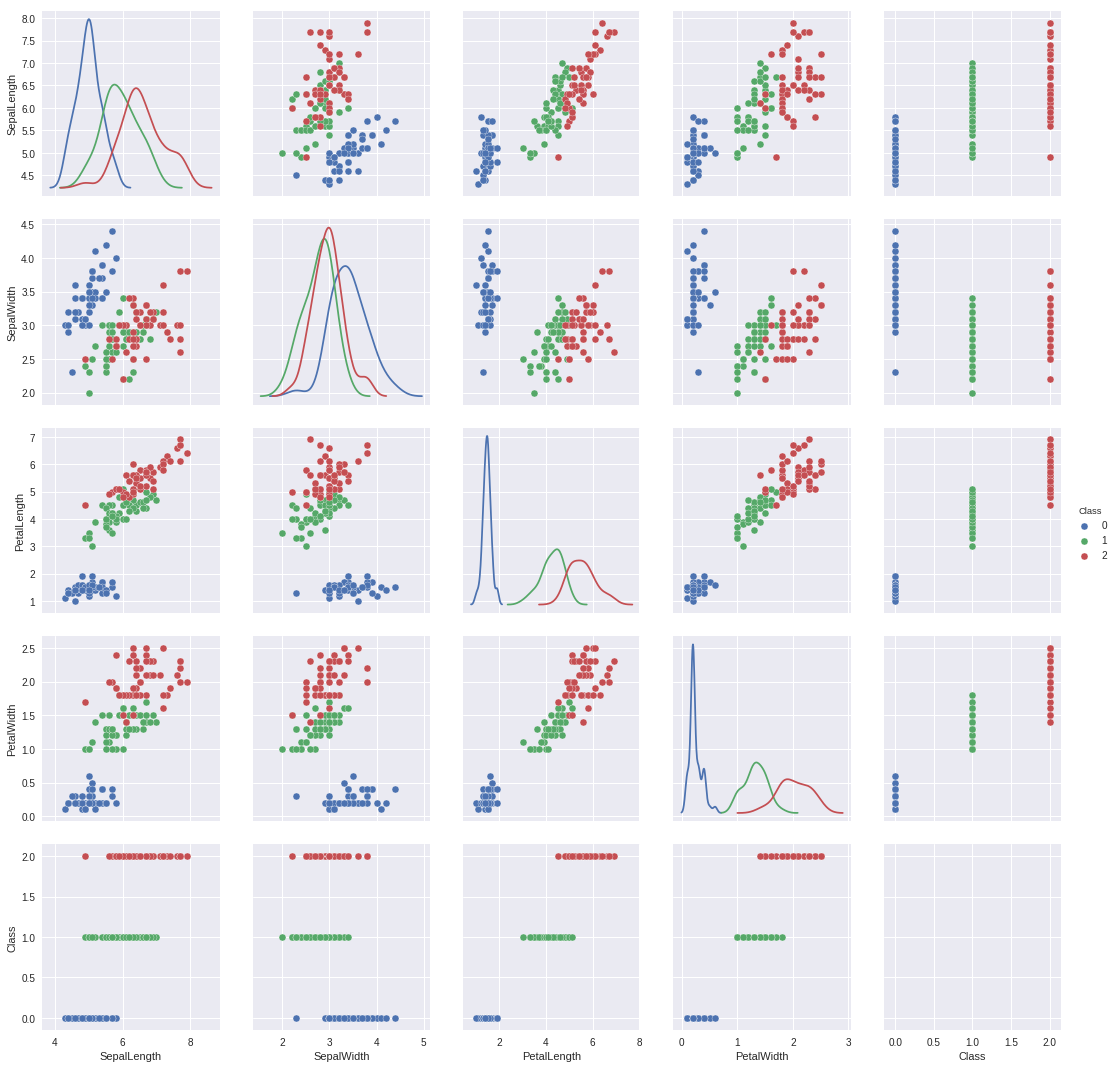

In [14]:
sns.pairplot(data, hue="Class", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1518d7c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe151f02cd0>]], dtype=object)

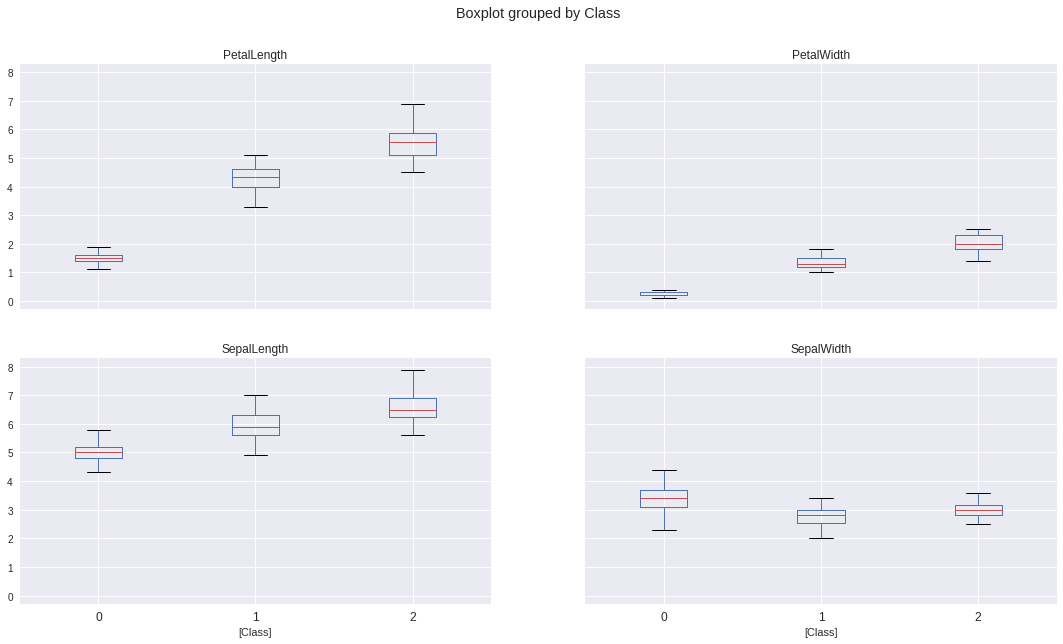

In [15]:
# We can quickly make a boxplot with Pandas on each feature split out by species
data.boxplot(by="Class", figsize=(18,10))

In [16]:
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']

([<matplotlib.axis.XTick at 0x7fe15151fd50>,
 <a list of 4 Text xticklabel objects>)

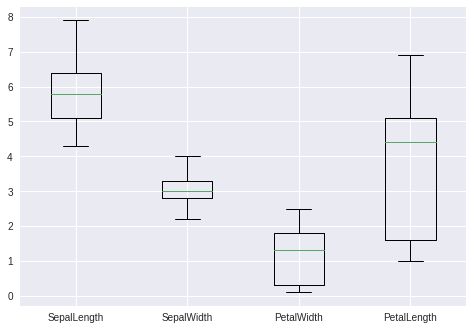

In [17]:
#flier_high = q3+1.5* interquartile-range
# flier_low = q1-1.5* interquartile-range
# mid-point=median

# basic plot
pdata=data[['SepalLength','SepalWidth','PetalWidth','PetalLength']].dropna()
plt.boxplot(np.asarray(pdata))
# plt.set_xlabel()
pylab.xticks([1, 2, 3,4],['SepalLength','SepalWidth','PetalWidth','PetalLength'])

In [18]:
def boxPlotByClass(data,axes,classlabel):
    #Plots a box plot arranged by class...
    idx=data['Class']==classlabel
    pdata=data[idx][['SepalLength','SepalWidth','PetalWidth','PetalLength']].dropna();
    axes.boxplot(np.asarray(pdata))
# plt.set_xlabel()
    axes.set_xticklabels(['SLength','SWidth','PWidth','PLength'])
    axes.set_title('Class={}'.format(classlabel))

### Plot the box-plot class wise as well... i,e.

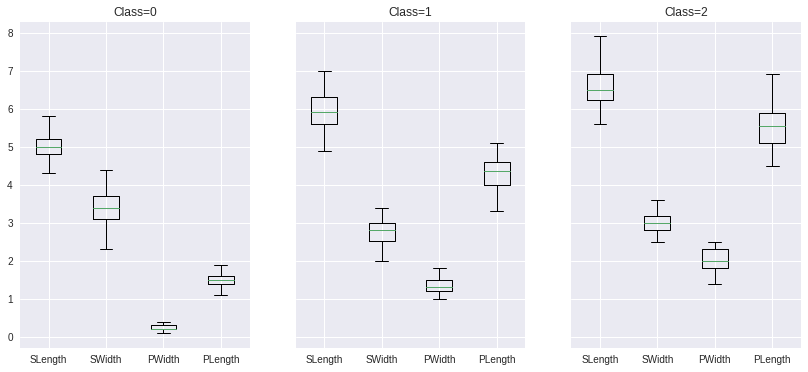

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(14,6),squeeze=False,sharey=True,)

classes=np.unique(data['Class'].dropna())

boxPlotByClass(data,axes[0,0],classes[0])
boxPlotByClass(data,axes[0,1],classes[1])
boxPlotByClass(data,axes[0,2],classes[2])

#### You can also boxplot each feature categorized by the classes...

In [20]:
def boxPlotByFeature(data,axes,xlabel):
    #Plots a box plot for a given feature by class...
    classes=np.unique(data['Class'].dropna())
    legends=[c for c in classes]
    x=data[data['Class']==classes[0]][xlabel].dropna();
    y=data[data['Class']==classes[1]][xlabel].dropna();
    z=data[data['Class']==classes[2]][xlabel].dropna();
    t=[]
    t.append(list(x))
    t.append(list(y))
    t.append(list(z))
    axes.boxplot(t)
    axes.set_xticklabels(legends)
    axes.set_title('Feature={}'.format(xlabel))

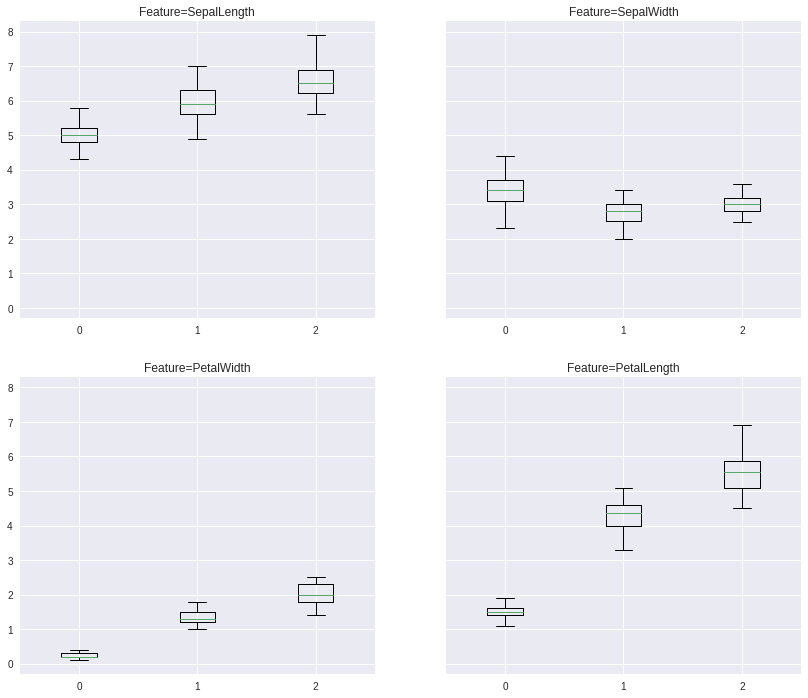

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,12),squeeze=False,sharey=True,)

features=['SepalLength','SepalWidth','PetalWidth','PetalLength']

boxPlotByFeature(data,axes[0,0],features[0])
boxPlotByFeature(data,axes[0,1],features[1])
boxPlotByFeature(data,axes[1,0],features[2])
boxPlotByFeature(data,axes[1,1],features[3])

## Q-Q Plot

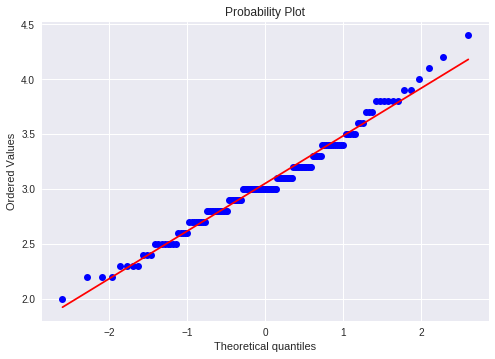

In [22]:
import scipy.stats as stats
stats.probplot(data['SepalWidth'], dist="norm", plot=plt)
plt.show()